# Pump Sensor Data - Sanitization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [2]:
FIGSIZE = (18, 3)

# Load Dataset

In [3]:
PATH = "data/sensor.csv"
df_data = pd.read_csv(PATH)

print(df_data.shape)

df_data

(220320, 55)


Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0                0  2018-04-01 00:00:00   2.465394   47.09201  53.211800   
1                1  2018-04-01 00:01:00   2.465394   47.09201  53.211800   
2                2  2018-04-01 00:02:00   2.444734   47.35243  53.211800   
3                3  2018-04-01 00:03:00   2.460474   47.09201  53.168400   
4                4  2018-04-01 00:04:00   2.445718   47.13541  53.211800   
...            ...                  ...        ...        ...        ...   
220315      220315  2018-08-31 23:55:00   2.407350   47.69965  50.520830   
220316      220316  2018-08-31 23:56:00   2.400463   47.69965  50.564240   
220317      220317  2018-08-31 23:57:00   2.396528   47.69965  50.520830   
220318      220318  2018-08-31 23:58:00   2.406366   47.69965  50.520832   
220319      220319  2018-08-31 23:59:00   2.396528   47.69965  50.520832   

        sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  ...  \
0       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
1       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
2       46.397570  638.888900   73.54598   13.32465   16.03733  ...   
3       46.397568  628.125000   76.98898   13.31742   16.24711  ...   
4       46.397568  636.458300   76.58897   13.35359   16.21094  ...   
...           ...         ...        ...        ...        ...  ...   
220315  43.142361  634.722229   64.59095   15.11863   16.65220  ...   
220316  43.142361  630.902771   65.83363   15.15480   16.70284  ...   
220317  43.142361  625.925903   67.29445   15.08970   16.70284  ...   
220318  43.142361  635.648100   65.09175   15.11863   16.56539  ...   
220319  43.142361  639.814800   65.45634   15.11863   16.65220  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
1        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
2        41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   
3        40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   
4        41.40625  38.773150   65.10416   51.79398  38.773150   158.2755   
...           ...        ...        ...        ...        ...        ...   
220315   38.28125  68.287030   52.37268   48.32176  41.087960   212.3843   
220316   38.28125  66.840280   50.63657   48.03241  40.798610   213.8310   
220317   39.06250  65.393520   48.90046   48.03241  40.798610   217.3032   
220318   40.62500  64.236110   47.74306   48.32176  40.509258   222.5116   
220319   41.40625  62.789350   46.29630   48.90046  40.219910   227.4306   

        sensor_49  sensor_50  sensor_51  machine_status  
0        67.70834   243.0556   201.3889          NORMAL  
1        67.70834   243.0556   201.3889          NORMAL  
2        67.12963   241.3194   203.7037          NORMAL  
3        66.84028   240.4514   203.1250          NORMAL  
4        66.55093   242.1875   201.3889          NORMAL  
...           ...        ...        ...             ...  
220315  153.64580        NaN   231.1921          NORMAL  
220316  156.25000        NaN   231.1921          NORMAL  
220317  155.38190        NaN   232.0602          NORMAL  
220318  153.93520        NaN   234.0856          NORMAL  
220319  150.46300        NaN   234.0856          NORMAL  

[220320 rows x 55 columns]

In [4]:
# Analyse Column
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

# Analyse timestamp

2018-04-01 00:00:00  to  2018-08-31 23:59:00

count    220319.0
mean         60.0
std           0.0
min          60.0
25%          60.0
50%          60.0
75%          60.0
max          60.0
Name: timestamp, dtype: float64


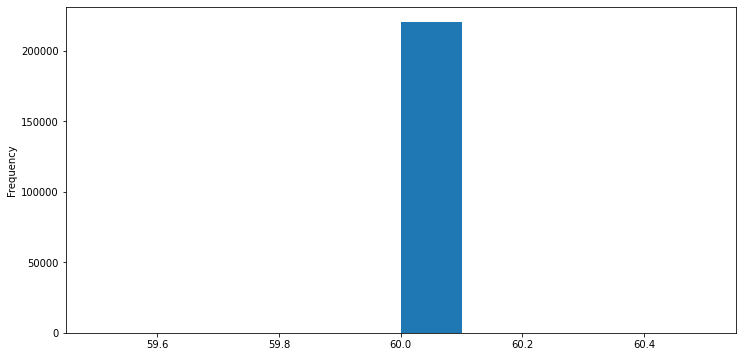

In [5]:
series_datetime = pd.to_datetime(df_data['timestamp'])
print( series_datetime.min(), ' to ', series_datetime.max() )

print("")

time_diffs = series_datetime.diff().dropna().dt.total_seconds()
print(time_diffs.describe())

plt.figure(figsize=(12, 6))
_ = time_diffs.plot.hist()

The observations are recorded every 60 seconds or per minute!

# Process Data

In [6]:
df_data_new = df_data.copy()

df_data_new['datetime'] = pd.to_datetime(df_data['timestamp'])
df_data_new.set_index('datetime', inplace=True)

df_data_new

Unnamed: 0            timestamp  sensor_00  sensor_01  \
datetime                                                                     
2018-04-01 00:00:00           0  2018-04-01 00:00:00   2.465394   47.09201   
2018-04-01 00:01:00           1  2018-04-01 00:01:00   2.465394   47.09201   
2018-04-01 00:02:00           2  2018-04-01 00:02:00   2.444734   47.35243   
2018-04-01 00:03:00           3  2018-04-01 00:03:00   2.460474   47.09201   
2018-04-01 00:04:00           4  2018-04-01 00:04:00   2.445718   47.13541   
...                         ...                  ...        ...        ...   
2018-08-31 23:55:00      220315  2018-08-31 23:55:00   2.407350   47.69965   
2018-08-31 23:56:00      220316  2018-08-31 23:56:00   2.400463   47.69965   
2018-08-31 23:57:00      220317  2018-08-31 23:57:00   2.396528   47.69965   
2018-08-31 23:58:00      220318  2018-08-31 23:58:00   2.406366   47.69965   
2018-08-31 23:59:00      220319  2018-08-31 23:59:00   2.396528   47.69965   

                     sensor_02  sensor_03   sensor_04  sensor_05  sensor_06  \
datetime                                                                      
2018-04-01 00:00:00  53.211800  46.310760  634.375000   76.45975   13.41146   
2018-04-01 00:01:00  53.211800  46.310760  634.375000   76.45975   13.41146   
2018-04-01 00:02:00  53.211800  46.397570  638.888900   73.54598   13.32465   
2018-04-01 00:03:00  53.168400  46.397568  628.125000   76.98898   13.31742   
2018-04-01 00:04:00  53.211800  46.397568  636.458300   76.58897   13.35359   
...                        ...        ...         ...        ...        ...   
2018-08-31 23:55:00  50.520830  43.142361  634.722229   64.59095   15.11863   
2018-08-31 23:56:00  50.564240  43.142361  630.902771   65.83363   15.15480   
2018-08-31 23:57:00  50.520830  43.142361  625.925903   67.29445   15.08970   
2018-08-31 23:58:00  50.520832  43.142361  635.648100   65.09175   15.11863   
2018-08-31 23:59:00  50.520832  43.142361  639.814800   65.45634   15.11863   

                     sensor_07  ...  sensor_43  sensor_44  sensor_45  \
datetime                        ...                                    
2018-04-01 00:00:00   16.13136  ...   41.92708  39.641200   65.68287   
2018-04-01 00:01:00   16.13136  ...   41.92708  39.641200   65.68287   
2018-04-01 00:02:00   16.03733  ...   41.66666  39.351852   65.39352   
2018-04-01 00:03:00   16.24711  ...   40.88541  39.062500   64.81481   
2018-04-01 00:04:00   16.21094  ...   41.40625  38.773150   65.10416   
...                        ...  ...        ...        ...        ...   
2018-08-31 23:55:00   16.65220  ...   38.28125  68.287030   52.37268   
2018-08-31 23:56:00   16.70284  ...   38.28125  66.840280   50.63657   
2018-08-31 23:57:00   16.70284  ...   39.06250  65.393520   48.90046   
2018-08-31 23:58:00   16.56539  ...   40.62500  64.236110   47.74306   
2018-08-31 23:59:00   16.65220  ...   41.40625  62.789350   46.29630   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
datetime                                                                     
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   243.0556   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   243.0556   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   241.3194   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   240.4514   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   242.1875   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00   48.32176  41.087960   212.3843  153.64580        NaN   
2018-08-31 23:56:00   48.03241  40.798610   213.8310  156.25000        NaN   
2018-08-31 23:57:00   48.03241  40.798610   217.3032  155.38190        NaN   
2018-08-31 23:58:00   48.32176  40.509258   222.5116  153.93520        NaN   
2018-08-31 23:59:00   48.90046  40.219910   227.4306  150.46300        NaN   

                     senso

## Drop columns if required

In [7]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx].sort_values(by=['percent'], ascending=False)

# Let's use above function to look at top ten columns with NaNs
_df_nan = calc_percent_NAs(df_data_new)
_df_nan

percent
sensor_15  1.000000
sensor_50  0.349569
sensor_51  0.069821
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327
sensor_32  0.000309
sensor_17  0.000209
sensor_18  0.000209
sensor_22  0.000186
sensor_25  0.000163
sensor_16  0.000141
sensor_43  0.000123
sensor_40  0.000123
sensor_38  0.000123
sensor_45  0.000123
sensor_39  0.000123
sensor_44  0.000123
sensor_46  0.000123
sensor_48  0.000123
sensor_49  0.000123
sensor_41  0.000123
sensor_42  0.000123
sensor_47  0.000123
sensor_14  0.000095
sensor_26  0.000091
sensor_05  0.000086
sensor_11  0.000086
sensor_13  0.000086
sensor_12  0.000086
sensor_04  0.000086
sensor_02  0.000086
sensor_10  0.000086
sensor_03  0.000086
sensor_20  0.000073
sensor_19  0.000073
sensor_35  0.000073
sensor_23  0.000073
sensor_24  0.000073
sensor_27  0.000073
sensor_21  0.000073
sensor_28  0.000073
sensor_37  0.000073
sensor_33  0.000073
sensor_34  0.000073
sensor_31  0.000073
sensor_36  0.000073

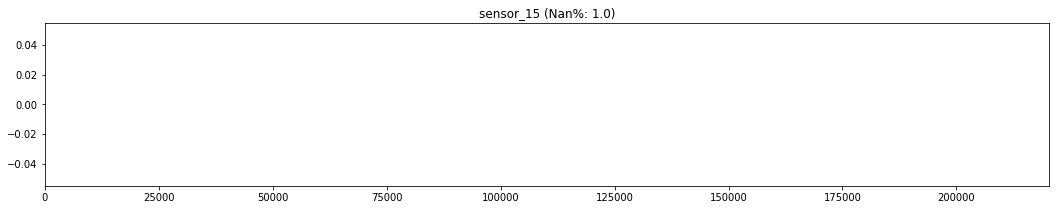

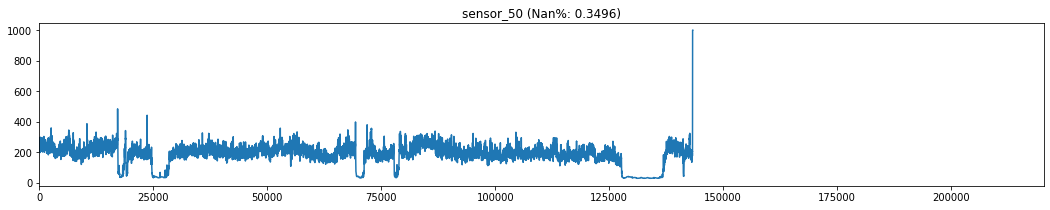

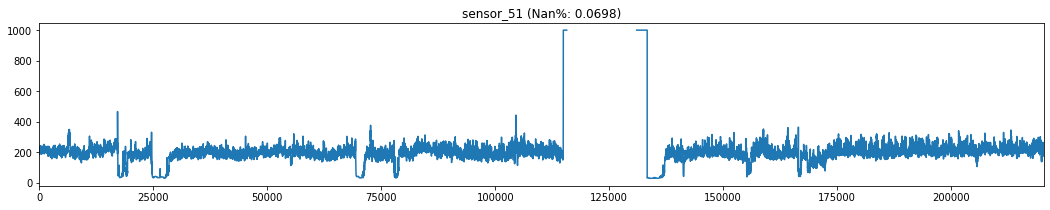

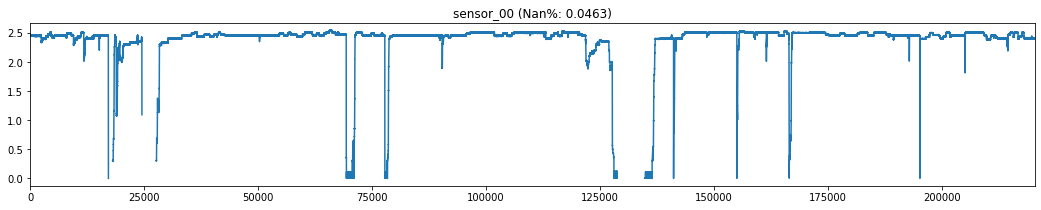

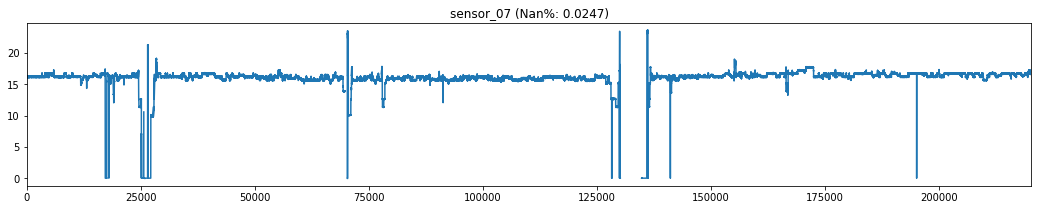

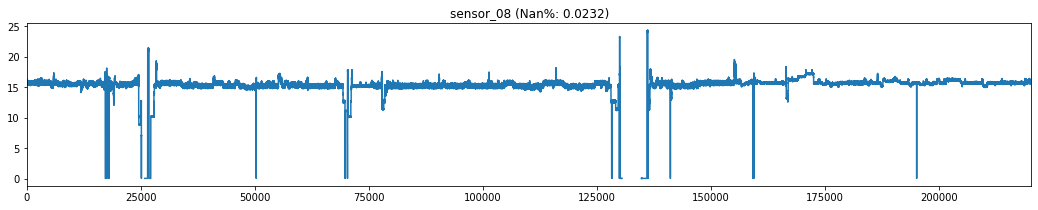

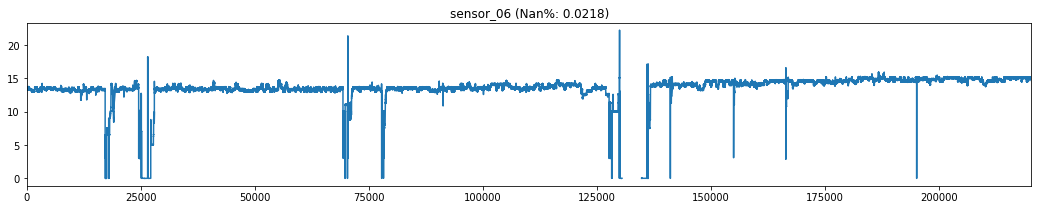

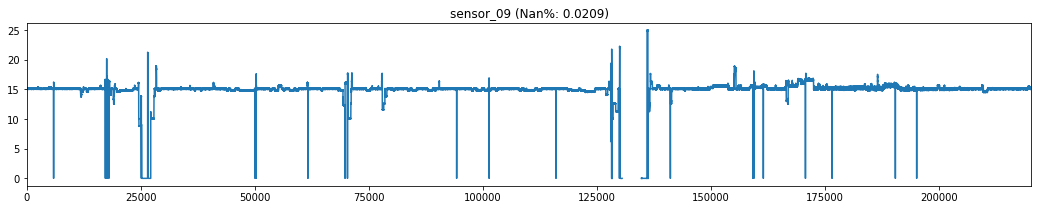

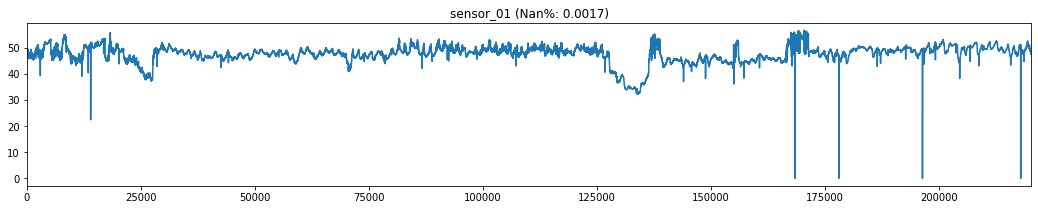

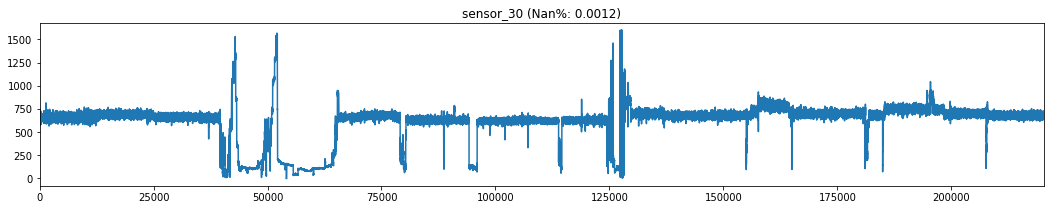

In [8]:
# Plot Top 5 sensor data with missing values
total_obs = df_data.shape[0]
for sensor_label, row in _df_nan.head(10).iterrows():
    plt.figure(figsize=FIGSIZE)
    plt.plot(df_data[sensor_label])
    plt.title(f"{sensor_label} (Nan%: {round(row['percent'], 4)})")
    plt.xlim([0, total_obs])


Dropping data for sensors 15, 50, 51 since there is no enough data:

In [9]:
LIST_COLS_DROP = ['Unnamed: 0', 'sensor_15', 'sensor_50', 'sensor_51']
df_data_new.drop(columns=LIST_COLS_DROP, inplace=True)
df_data_new

timestamp  sensor_00  sensor_01  sensor_02  \
datetime                                                                    
2018-04-01 00:00:00  2018-04-01 00:00:00   2.465394   47.09201  53.211800   
2018-04-01 00:01:00  2018-04-01 00:01:00   2.465394   47.09201  53.211800   
2018-04-01 00:02:00  2018-04-01 00:02:00   2.444734   47.35243  53.211800   
2018-04-01 00:03:00  2018-04-01 00:03:00   2.460474   47.09201  53.168400   
2018-04-01 00:04:00  2018-04-01 00:04:00   2.445718   47.13541  53.211800   
...                                  ...        ...        ...        ...   
2018-08-31 23:55:00  2018-08-31 23:55:00   2.407350   47.69965  50.520830   
2018-08-31 23:56:00  2018-08-31 23:56:00   2.400463   47.69965  50.564240   
2018-08-31 23:57:00  2018-08-31 23:57:00   2.396528   47.69965  50.520830   
2018-08-31 23:58:00  2018-08-31 23:58:00   2.406366   47.69965  50.520832   
2018-08-31 23:59:00  2018-08-31 23:59:00   2.396528   47.69965  50.520832   

                     sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  \
datetime                                                                      
2018-04-01 00:00:00  46.310760  634.375000   76.45975   13.41146   16.13136   
2018-04-01 00:01:00  46.310760  634.375000   76.45975   13.41146   16.13136   
2018-04-01 00:02:00  46.397570  638.888900   73.54598   13.32465   16.03733   
2018-04-01 00:03:00  46.397568  628.125000   76.98898   13.31742   16.24711   
2018-04-01 00:04:00  46.397568  636.458300   76.58897   13.35359   16.21094   
...                        ...         ...        ...        ...        ...   
2018-08-31 23:55:00  43.142361  634.722229   64.59095   15.11863   16.65220   
2018-08-31 23:56:00  43.142361  630.902771   65.83363   15.15480   16.70284   
2018-08-31 23:57:00  43.142361  625.925903   67.29445   15.08970   16.70284   
2018-08-31 23:58:00  43.142361  635.648100   65.09175   15.11863   16.56539   
2018-08-31 23:59:00  43.142361  639.814800   65.45634   15.11863   16.65220   

                     sensor_08  ...  sensor_41  sensor_42  sensor_43  \
datetime                        ...                                    
2018-04-01 00:00:00   15.56713  ...  30.989580  31.770832   41.92708   
2018-04-01 00:01:00   15.56713  ...  30.989580  31.770832   41.92708   
2018-04-01 00:02:00   15.61777  ...  30.468750  31.770830   41.66666   
2018-04-01 00:03:00   15.69734  ...  30.468750  31.510420   40.88541   
2018-04-01 00:04:00   15.69734  ...  30.989580  31.510420   41.40625   
...                        ...  ...        ...        ...        ...   
2018-08-31 23:55:00   15.65393  ...  30.468750  30.208330   38.28125   
2018-08-31 23:56:00   15.65393  ...  30.208332  29.947920   38.28125   
2018-08-31 23:57:00   15.69734  ...  29.947920  30.208330   39.06250   
2018-08-31 23:58:00   15.74074  ...  29.947916  30.208332   40.62500   
2018-08-31 23:59:00   15.65393  ...  29.947916  30.208332   41.40625   

                     sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
datetime                                                                     
2018-04-01 00:00:00  39.641200   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:01:00  39.641200   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:02:00  39.351852   65.39352   51.21528  38.194443   155.9606   
2018-04-01 00:03:00  39.062500   64.81481   51.21528  38.194440   155.9606   
2018-04-01 00:04:00  38.773150   65.10416   51.79398  38.773150   158.2755   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00  68.287030   52.37268   48.32176  41.087960   212.3843   
2018-08-31 23:56:00  66.840280   50.63657   48.03241  40.798610   213.8310   
2018-08-31 23:57:00  65.393520   48.90046   48.03241  40.798610   217.3032   
2018-08-31 23:58:00  64.236110   47.74306   48.32176  40.509258   222.5116   
2018-08-31 23:59:00  62.789350   46.29630   48.90046  40.219910   227.4306   

                     sensor_49  machine_status  


## Remove duplicate values

In [10]:
df_data_new = df_data_new.drop_duplicates()
print("New shape: ", df_data_new.shape)

count_del = df_data.shape[0]-df_data_new.shape[0]

print(f"{count_del} Rows were deleted.")

New shape:  (220320, 51)
0 Rows were deleted.


## Fill missing values (Interpolate)

References: 
- https://www.dezyre.com/recipes/deal-with-missing-values-in-timeseries-in-python
- https://jagan-singhh.medium.com/missing-data-in-time-series-5dcf19b0f40f

Text(0.5, 1.0, 'sensor_00 - Rolling mean')

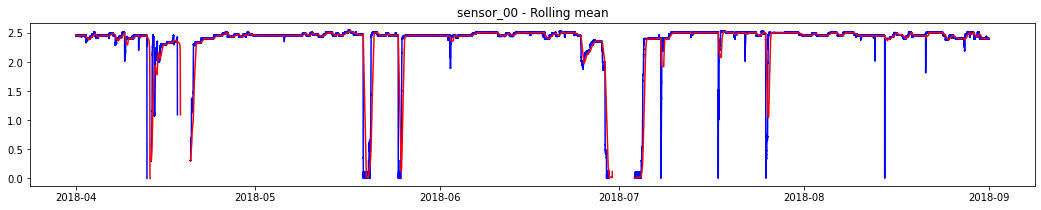

In [11]:
_SENSOR_LABEL = 'sensor_00'  # Use the column with the most null values
_WINDOW = 1*60*12  # hours 

_rolling_mean = df_data_new[_SENSOR_LABEL].rolling(window=_WINDOW, min_periods=1).mean()
# _rolling_mean = df_data_new[_SENSOR_LABEL].resample(rule='D').mean() 

plt.figure(figsize=FIGSIZE)
plt.plot(df_data_new[_SENSOR_LABEL], color='blue')
plt.plot(_rolling_mean, color='red')
plt.title(f'{_SENSOR_LABEL} - Rolling mean')

In [12]:
# (1) Apply Rolling mean
WINDOW = 1*60*12 # 12 hours
df_data_new = df_data_new.fillna( df_data_new.rolling(window=WINDOW, min_periods=1).mean() )

# (2) Fill remaining values with rolling mean over 10 days
df_data_new = df_data_new.fillna( df_data_new.rolling(window=1*60*24*10, min_periods=1).mean() )
# df_data_new = df_data_new.fillna(df_data_new.mean())
# df_data_new = df_data_new.fillna(df_data_new.interpolate())

Text(0.5, 1.0, 'sensor_00 - Filled values')

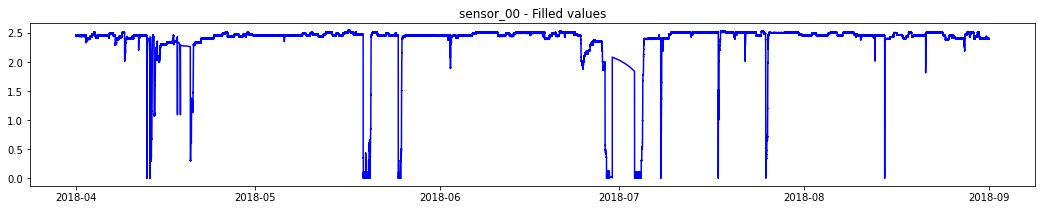

In [13]:
plt.figure(figsize=FIGSIZE)
plt.plot(df_data_new[_SENSOR_LABEL], color='blue')
plt.title(f'{_SENSOR_LABEL} - Filled values')

## Final Data

In [14]:
print(df_data_new.shape)
print()

df_data_new.info()

(220320, 51)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       220320 non-null  float64
 2   sensor_01       220320 non-null  float64
 3   sensor_02       220320 non-null  float64
 4   sensor_03       220320 non-null  float64
 5   sensor_04       220320 non-null  float64
 6   sensor_05       220320 non-null  float64
 7   sensor_06       220320 non-null  float64
 8   sensor_07       220320 non-null  float64
 9   sensor_08       220320 non-null  float64
 10  sensor_09       220320 non-null  float64
 11  sensor_10       220320 non-null  float64
 12  sensor_11       220320 non-null  float64
 13  sensor_12       220320 non-null  float64
 14  sensor_13       220320 non-null  float64
 15  sensor_14       220320 non-null  float64
 16  sensor_1

# Exploratory Data Analysis

In [15]:
def getSensorColnames():
    return sorted(list(set(df_data_new.columns)-set(['timestamp', 'machine_status'])))

## Machine Statuses

In [16]:
df_data_new['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

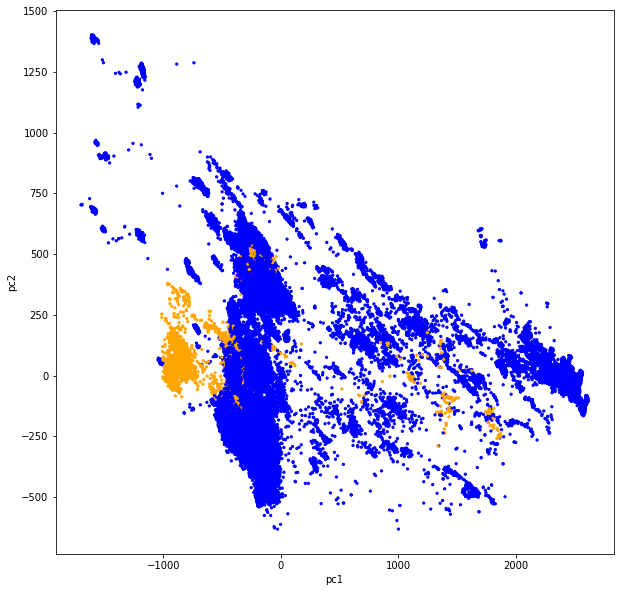

In [17]:
pca_2d = PCA(n_components=2)
feats_pca = pca_2d.fit_transform( df_data_new[getSensorColnames()] )


MAP_MACHINE_STATUS_COLORS = {
    'NORMAL': 'blue',
    'BROKEN': 'red',
    'RECOVERING': 'orange'
}

plt.figure(figsize=(10, 10))
_colors = [MAP_MACHINE_STATUS_COLORS[status] for status in df_data_new['machine_status']]
plt.scatter(x=feats_pca[:, 0], y=feats_pca[:, 1], color=_colors, s=5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

## Importance of each sensor

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

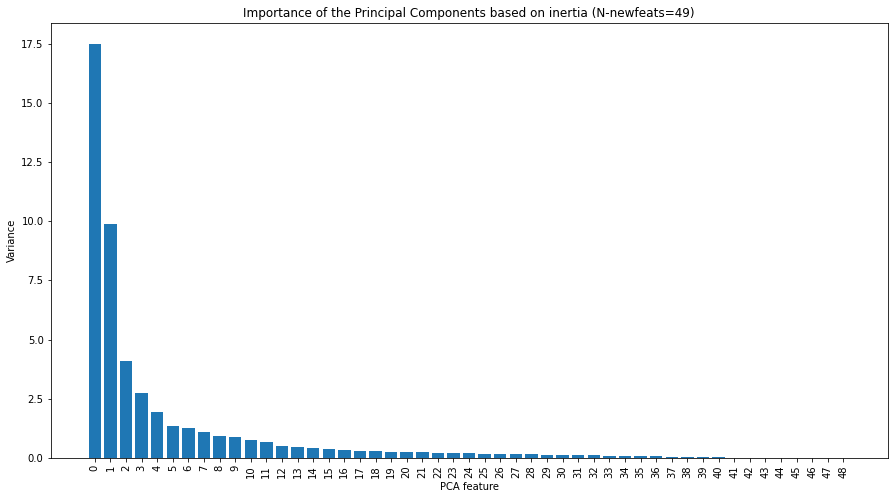

In [18]:
# Perform PCA and look at the most important principal components based on inertia
names = getSensorColnames()

# Get data
x = df_data_new[names]
n_new_feats = x.shape[1]

# Create processing pipeline
scaler = StandardScaler()
pca = PCA(n_components=n_new_feats)
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)


# Plot the principal components against their inertia
new_feat_names = range(0, x.shape[1])
_ = plt.figure(figsize=(15, 8))
_ = plt.bar(new_feat_names, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(new_feat_names)
_ = plt.xticks(rotation=90)
_ = plt.title(f"Importance of the Principal Components based on inertia (N-newfeats={n_new_feats})")
plt.show()

In [19]:
x.shape

(220320, 49)

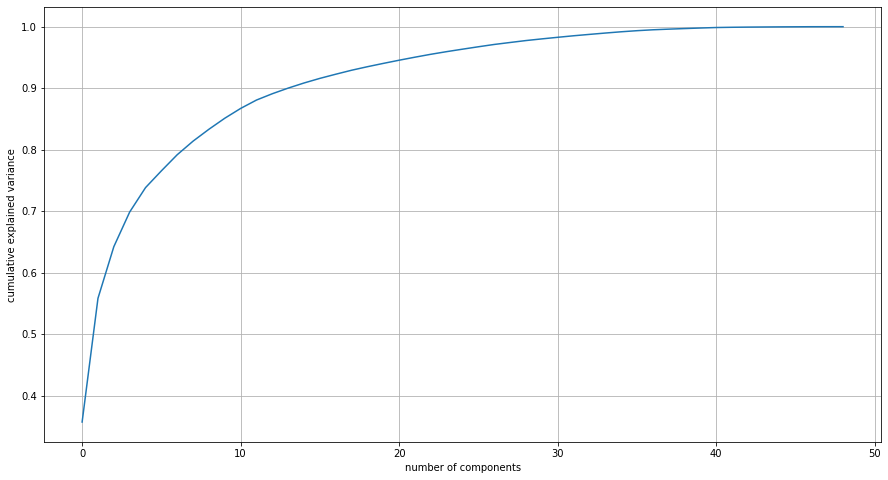

In [20]:
# Choosing the number of components
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

Here the curve shows that we need atleast 40 components to describe close to 100% of the variance.

## Visualize sensor data where the pump was broken

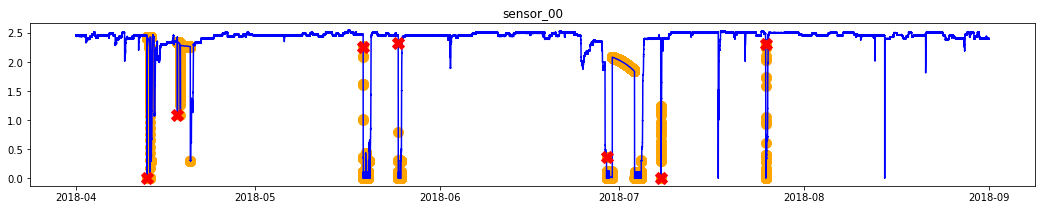

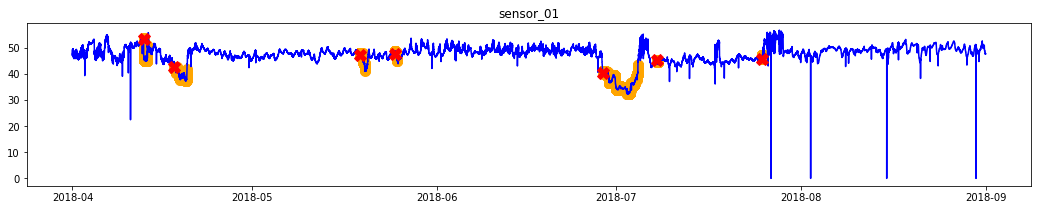

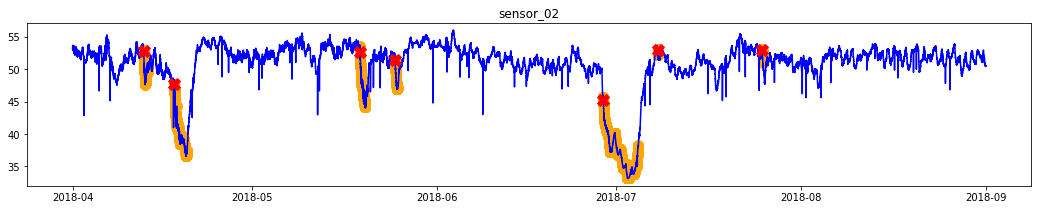

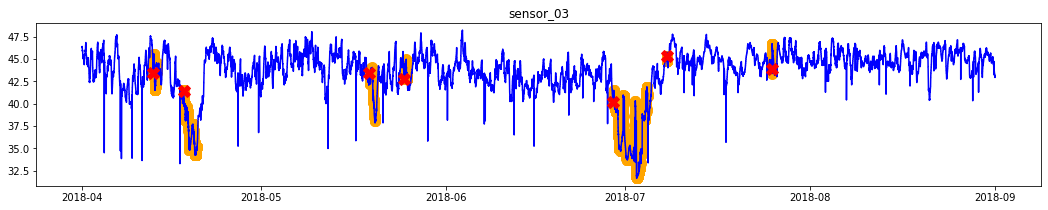

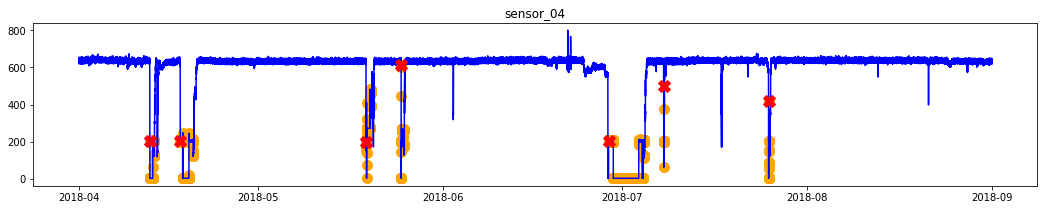

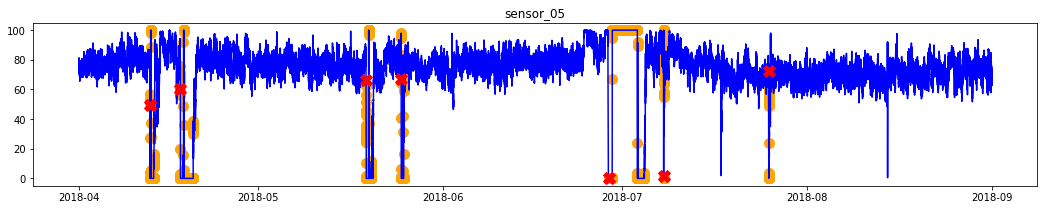

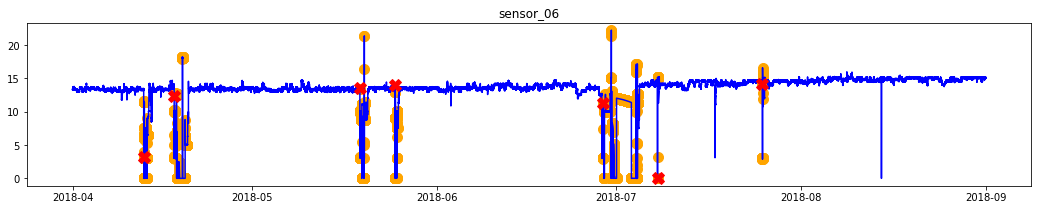

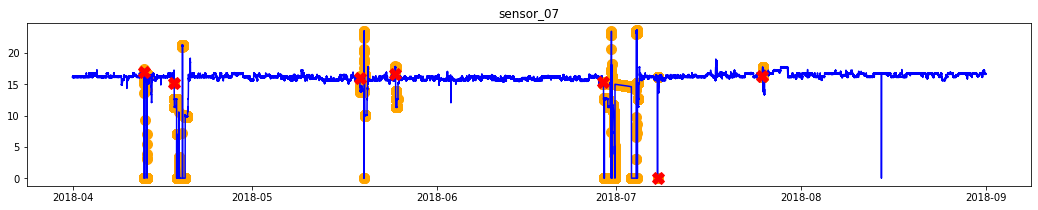

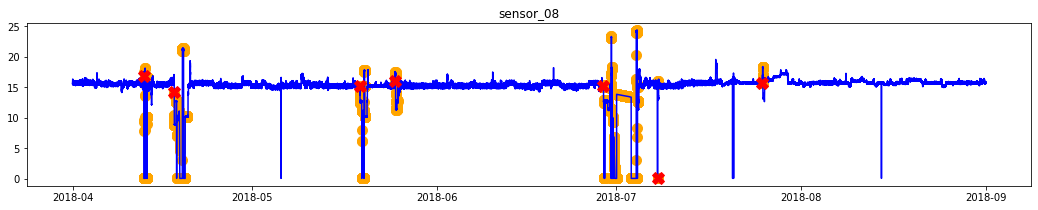

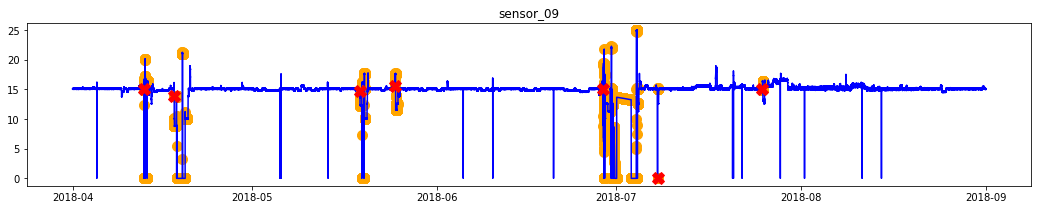

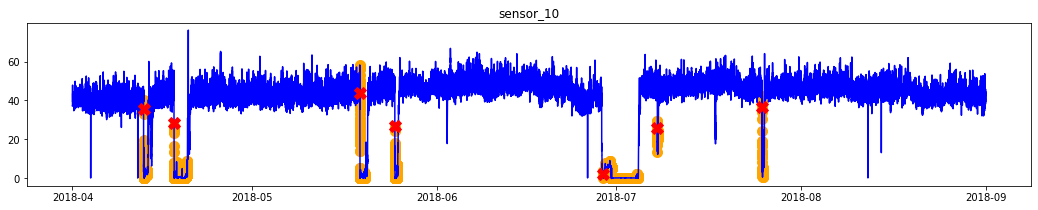

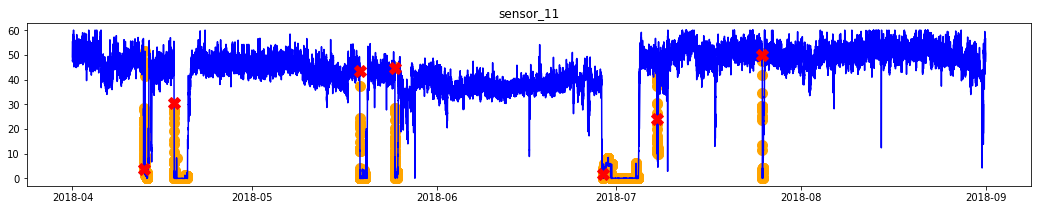

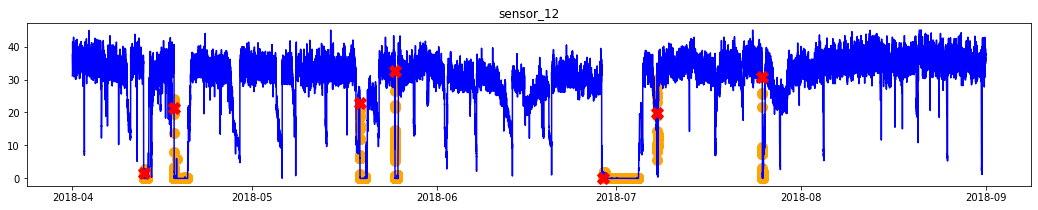

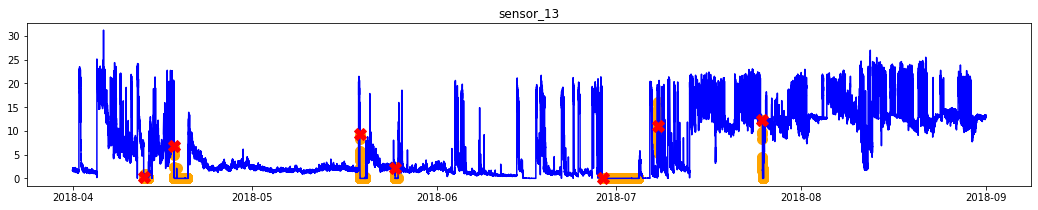

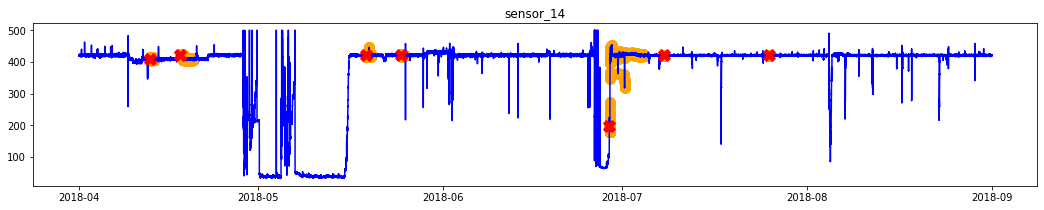

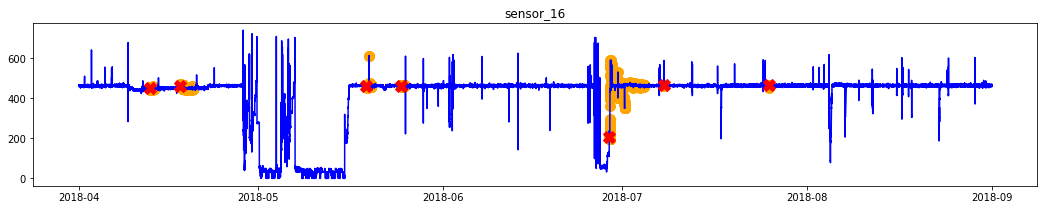

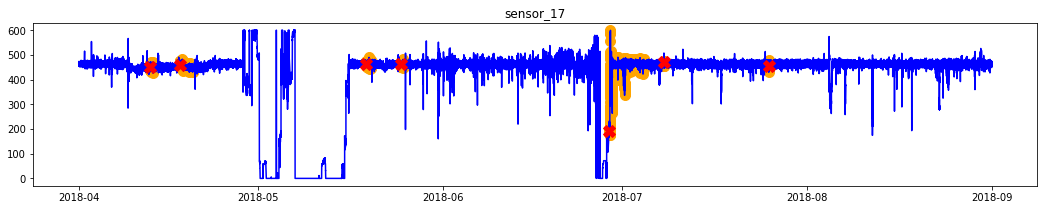

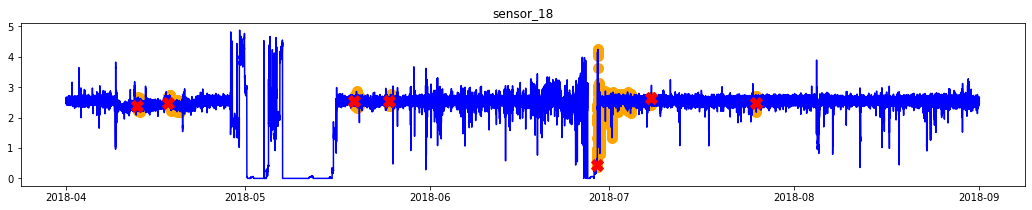

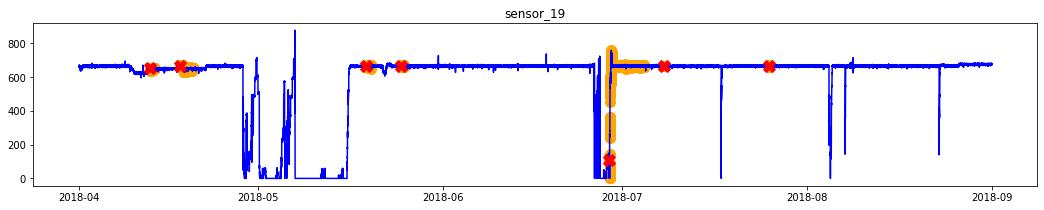

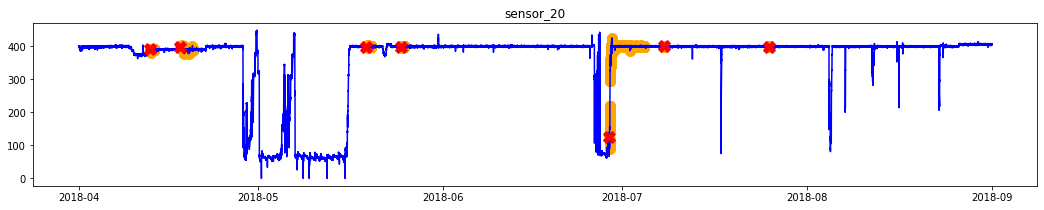

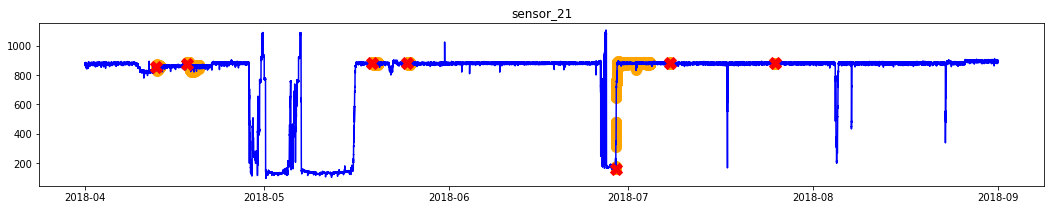

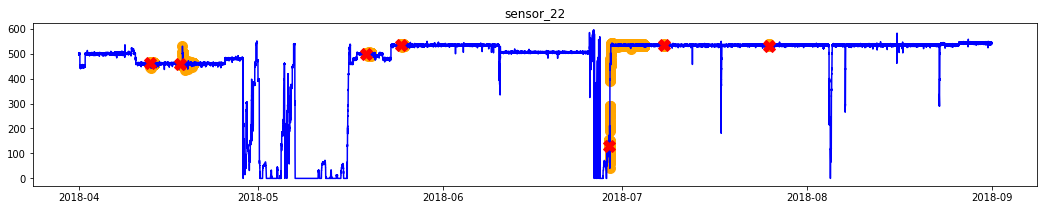

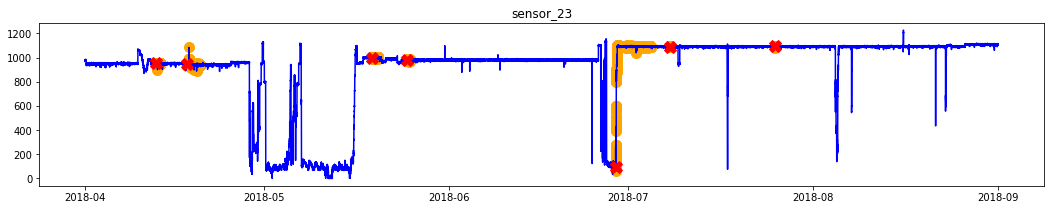

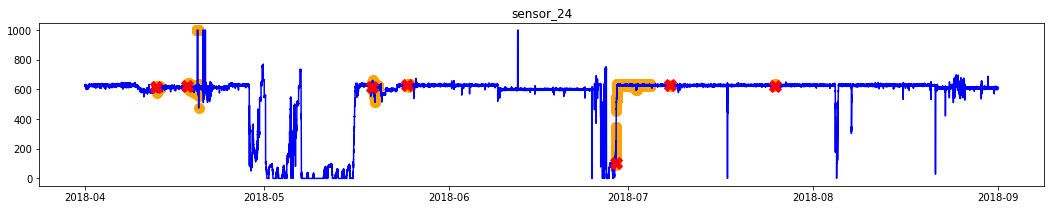

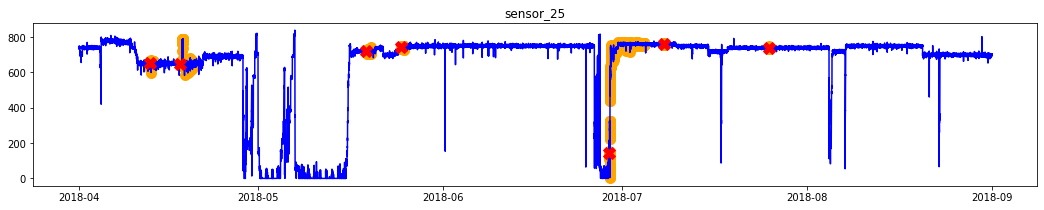

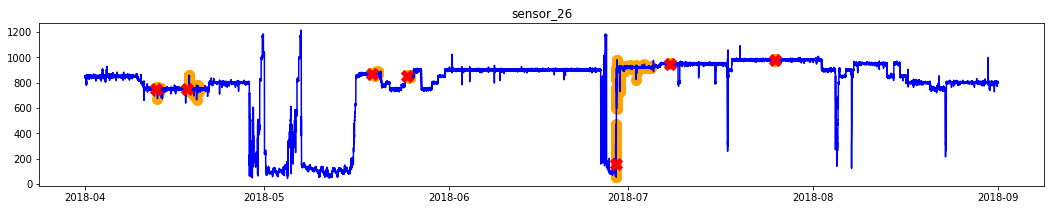

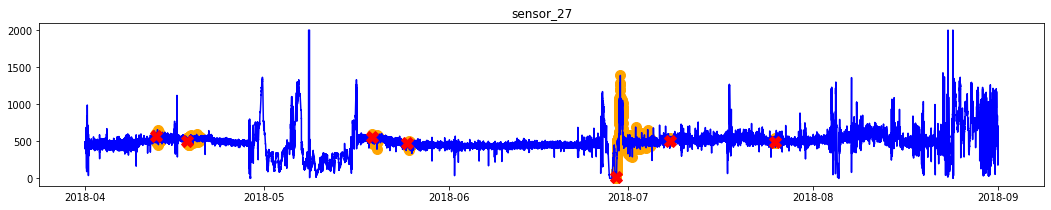

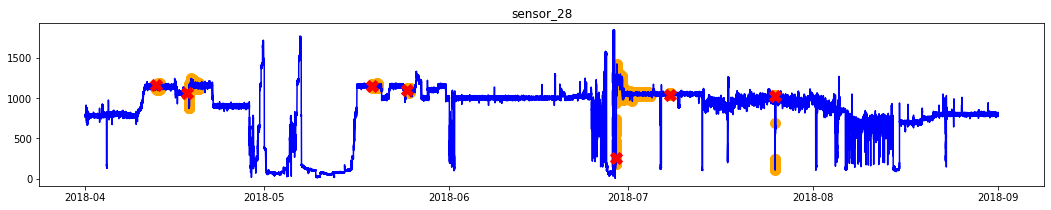

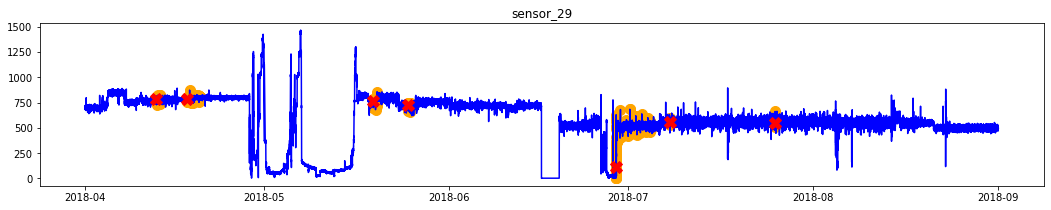

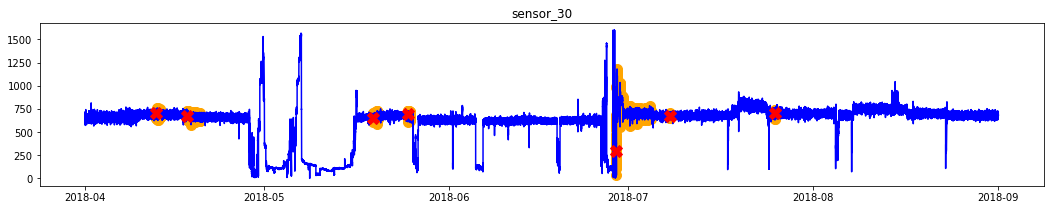

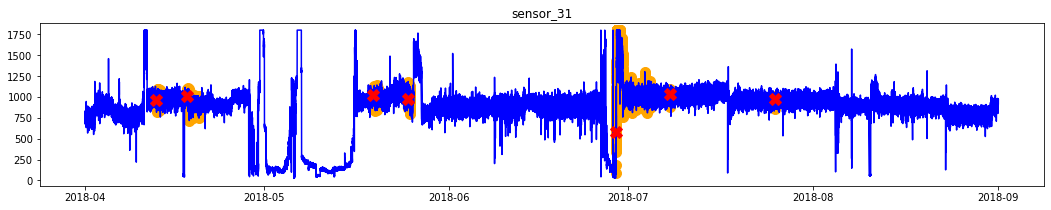

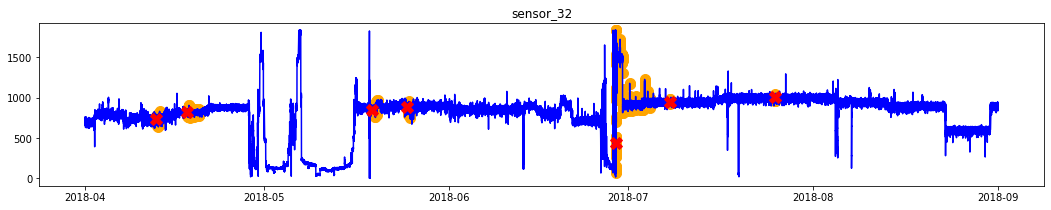

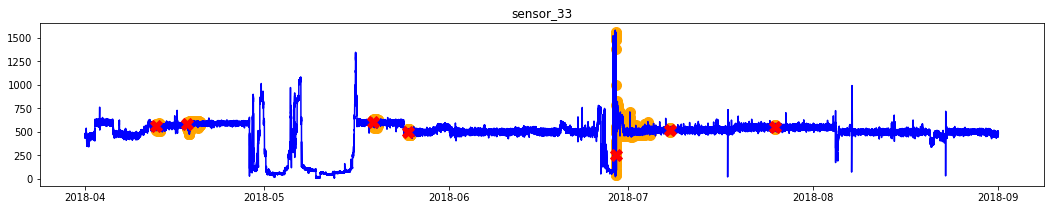

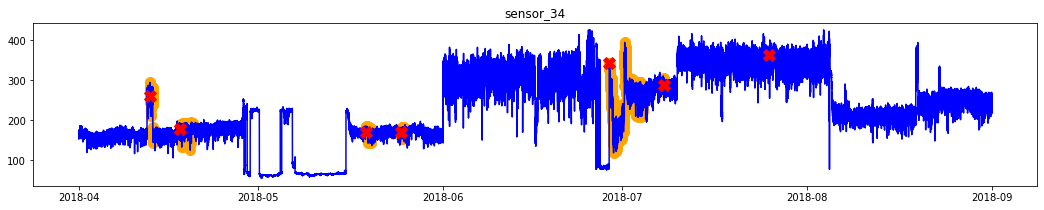

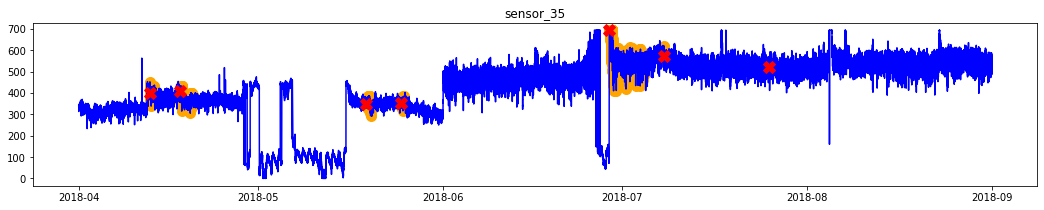

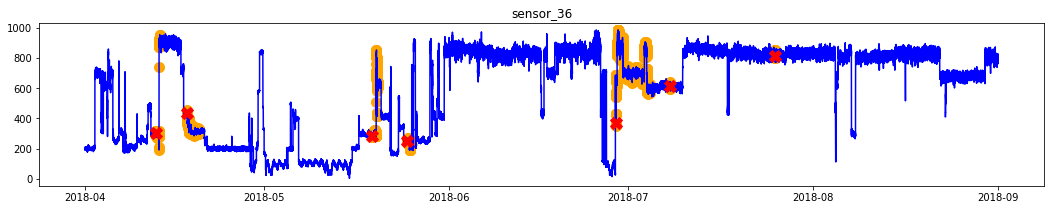

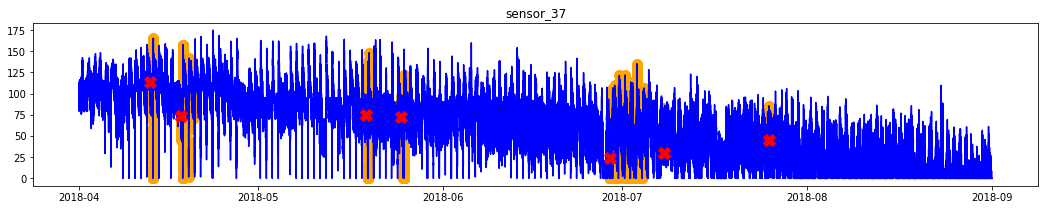

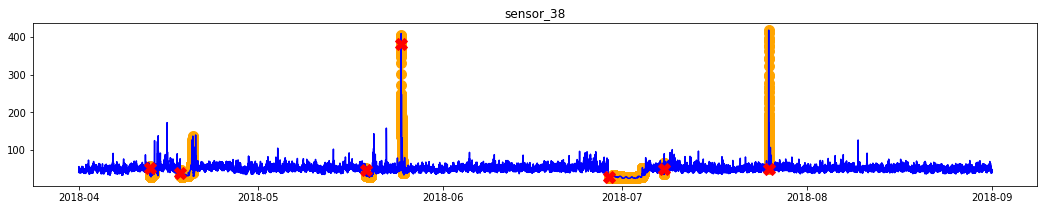

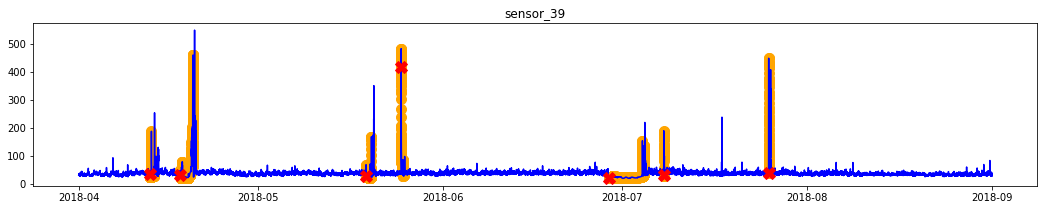

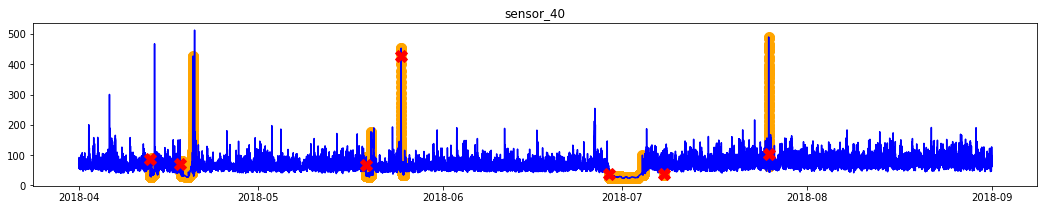

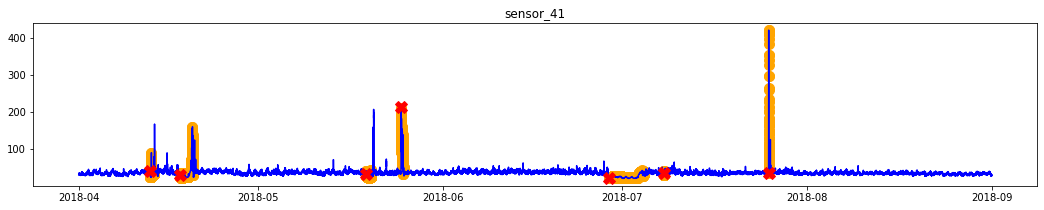

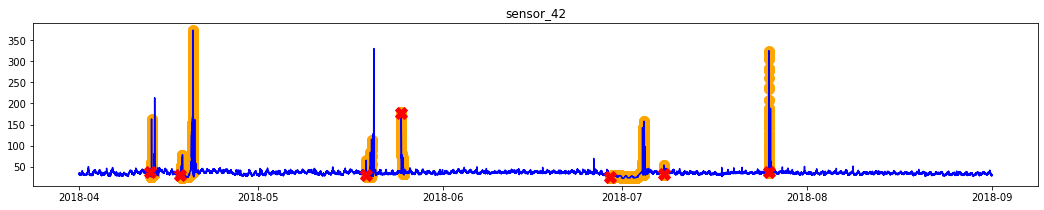

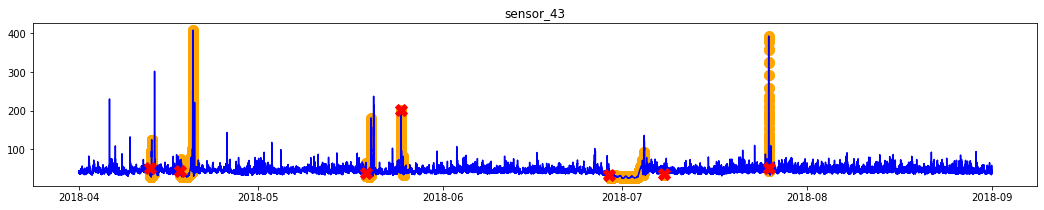

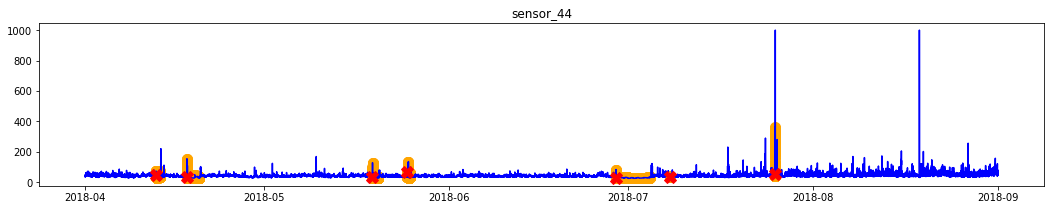

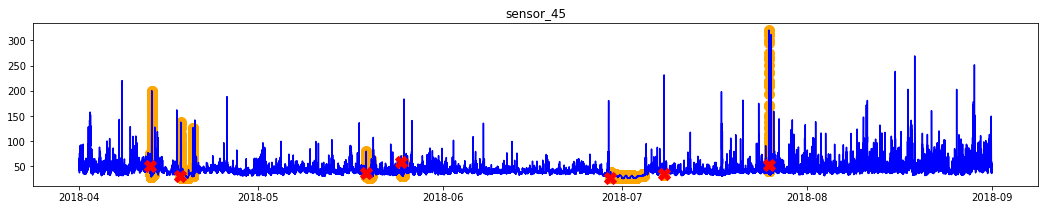

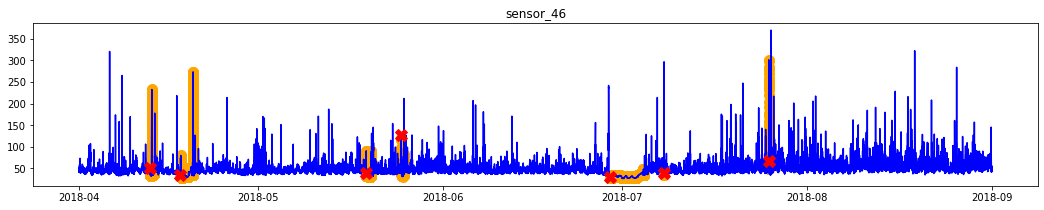

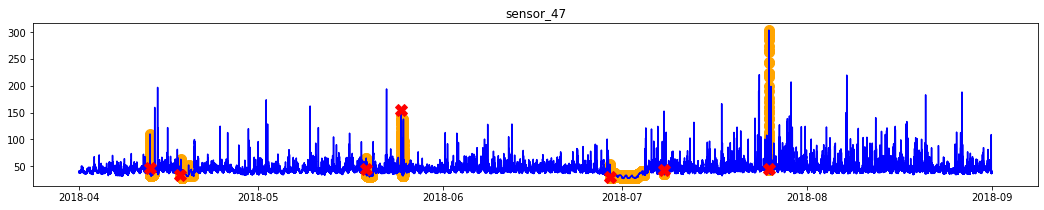

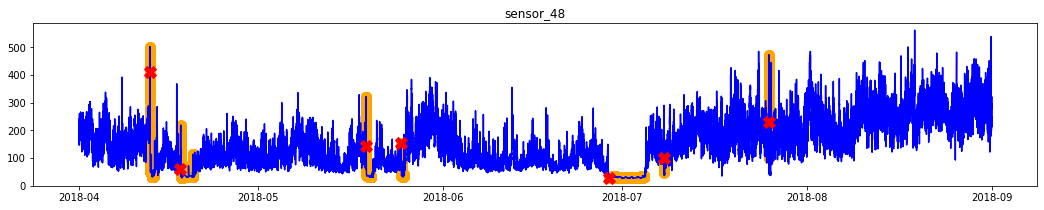

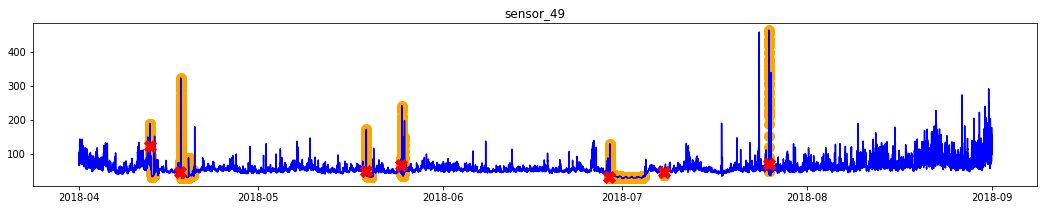

In [21]:
broken = df_data_new[df_data_new['machine_status']=='BROKEN']
recovering = df_data_new[df_data_new['machine_status']=='RECOVERING']

# Extract the names of the numerical columns
names = getSensorColnames()

# Plot time series for each sensor with BROKEN state marked with X in red color and RECOVERING state 
# marked with orange color
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(recovering[name], linestyle='none', marker='o', color='orange', markersize=10)
    _ = plt.plot(df_data_new[name], color='blue')
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.title(name)
    plt.show()

Some of the data was missing after the break point; when the pump was in recovery state. Since the values were  statistically added, this may lead to incorrect prediction. However, we will still rely on these value for now.

## Stationarity and Autocorrelation
In time series analysis, it is important that the data is stationary and have no autocorrelation. 

**Stationarity** refers to the behavior where the mean and standard deviation of the data changes over time, the data with such behavior is considered not stationary. 

On the other hand, **autocorrelation** refers to the behavior of the data where the data is correlated with itself in a different time period.

**In essence, the data must be stationary and not autocorrelated.**

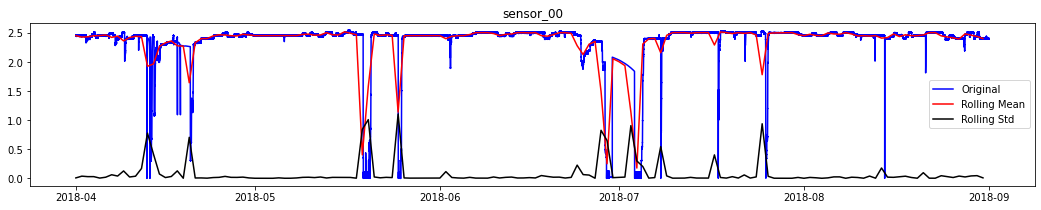

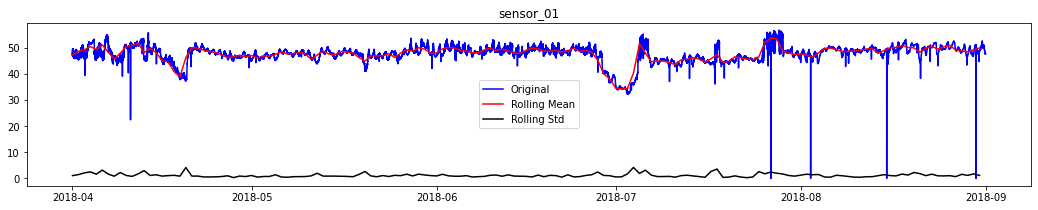

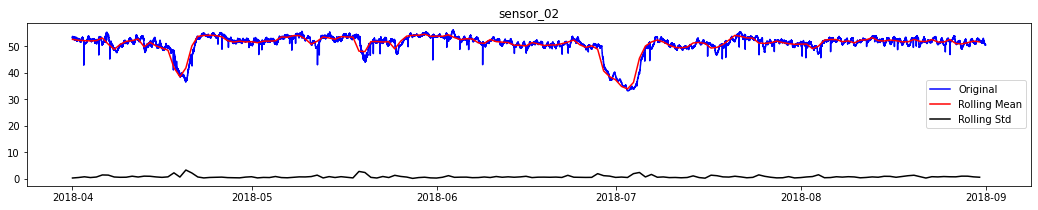

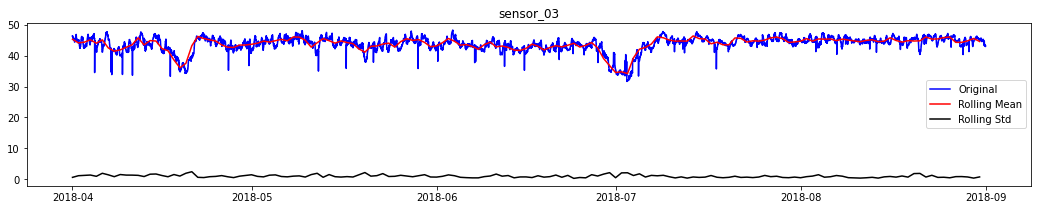

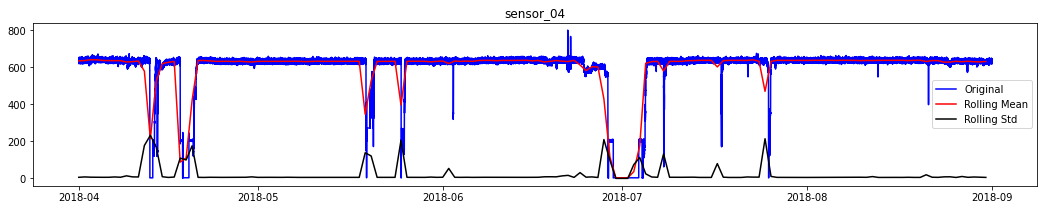

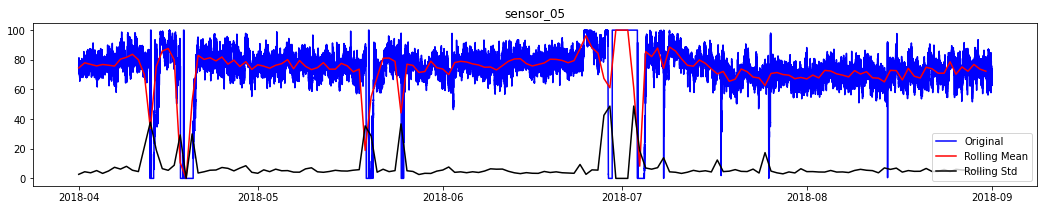

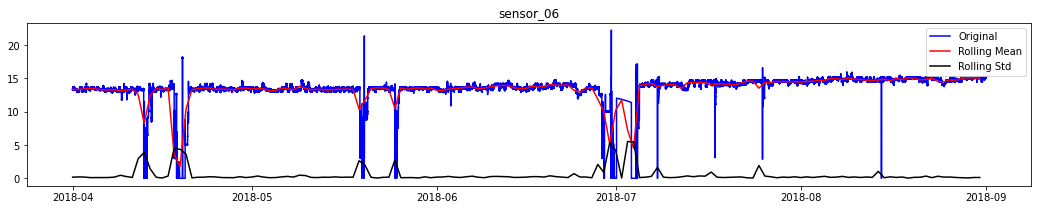

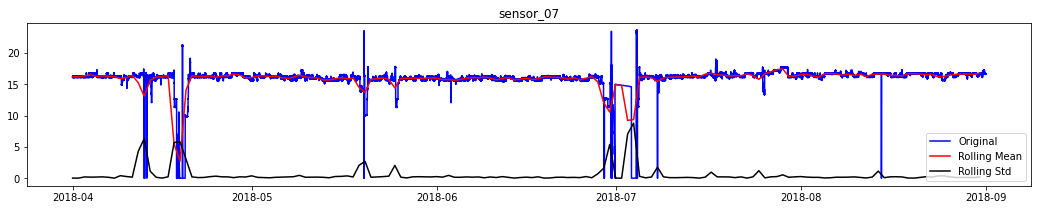

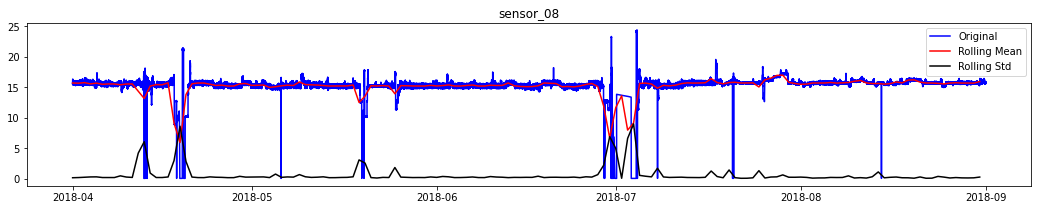

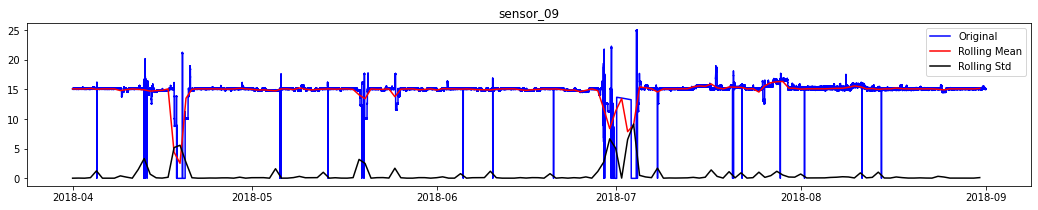

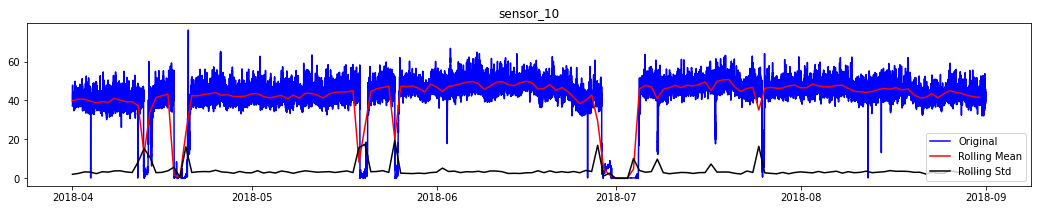

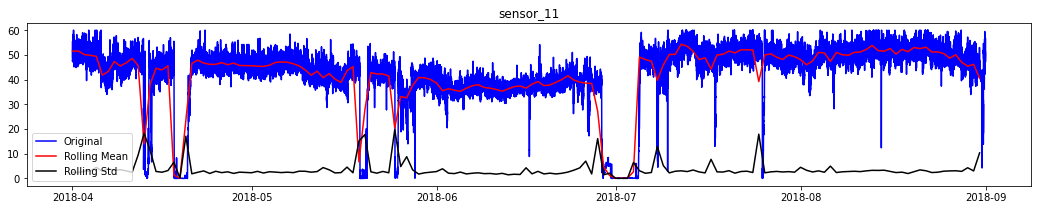

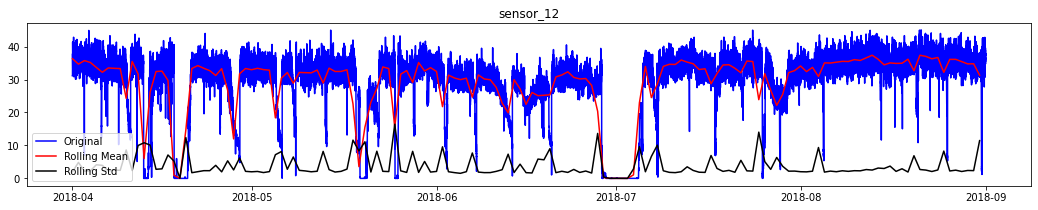

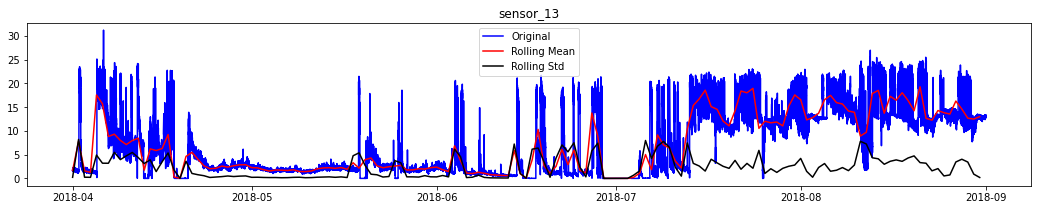

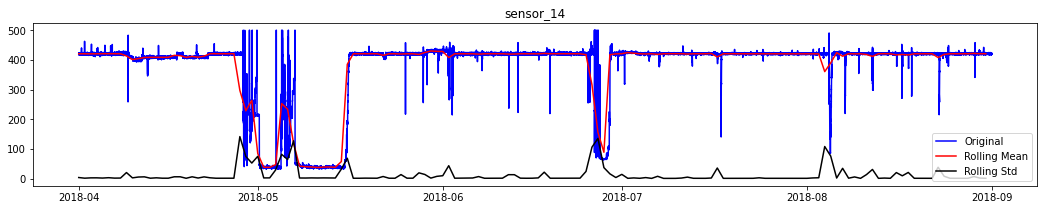

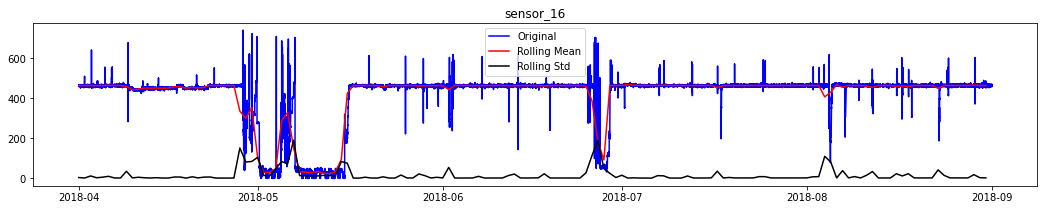

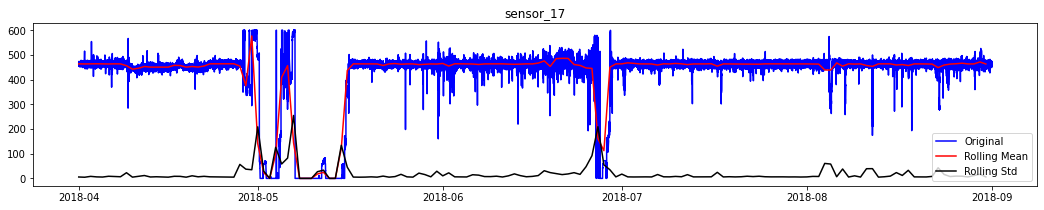

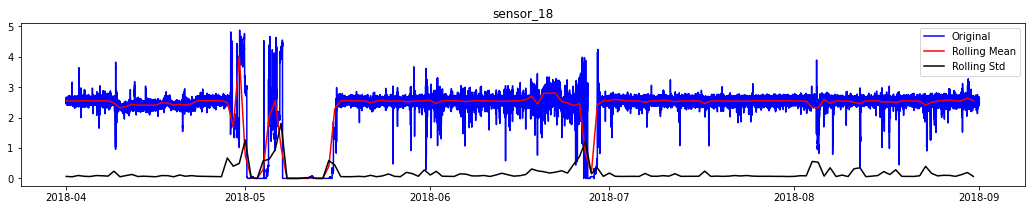

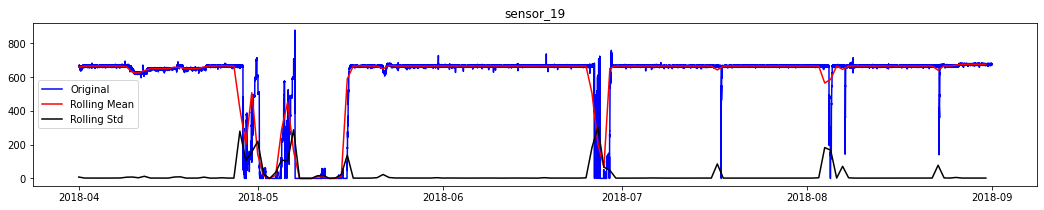

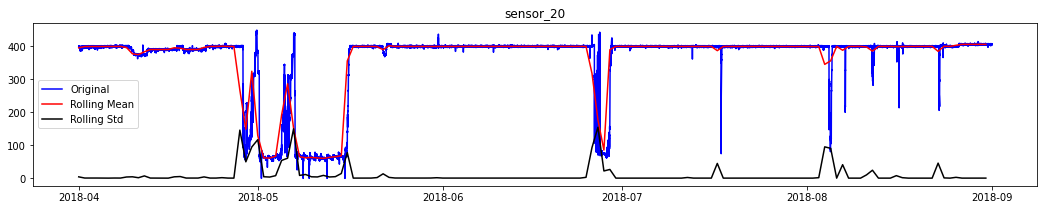

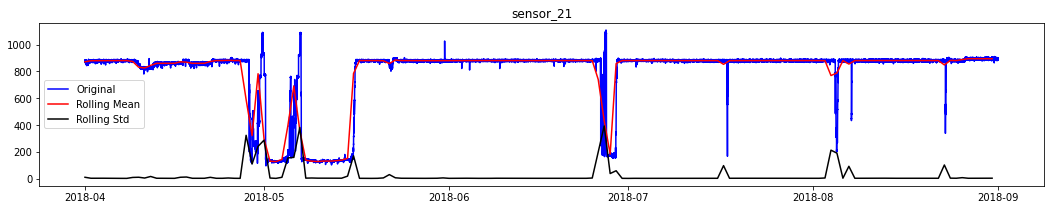

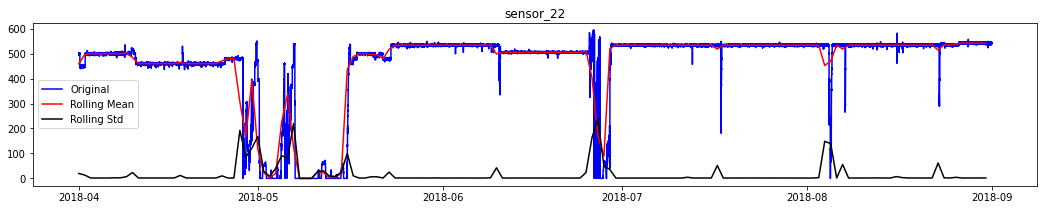

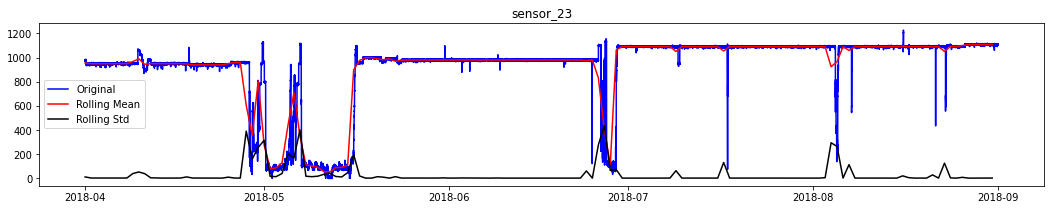

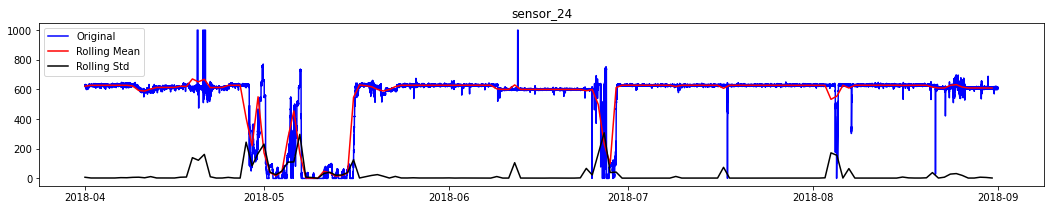

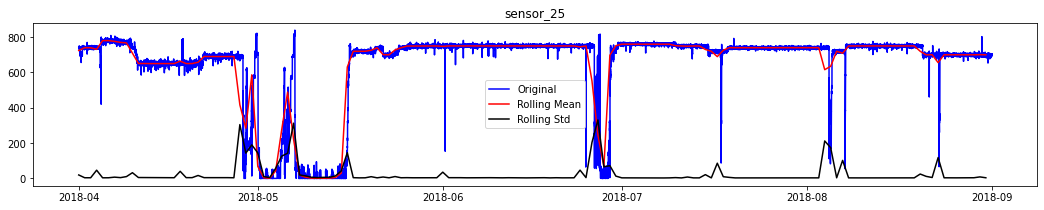

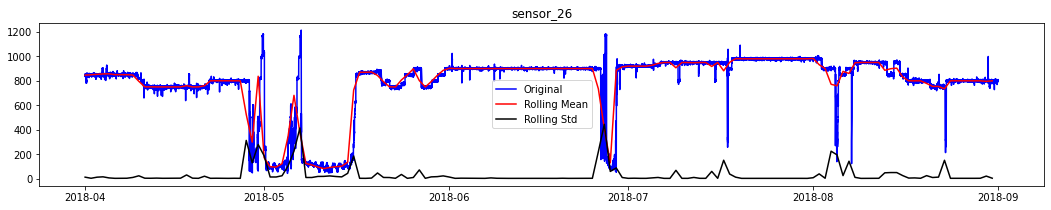

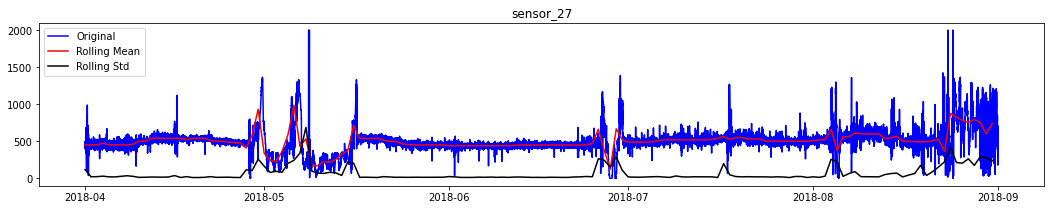

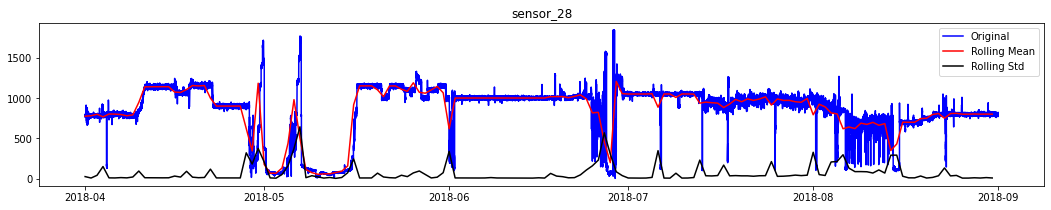

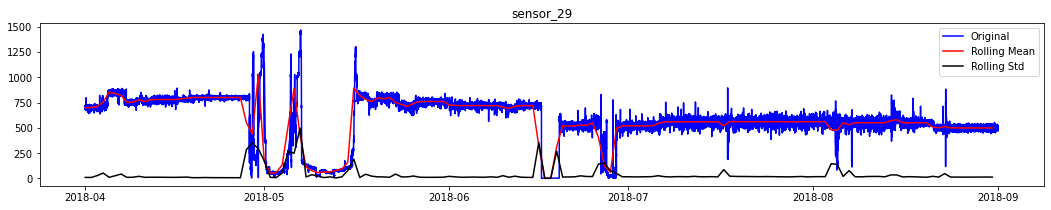

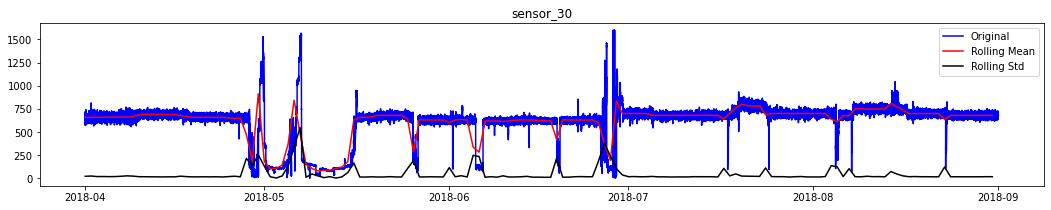

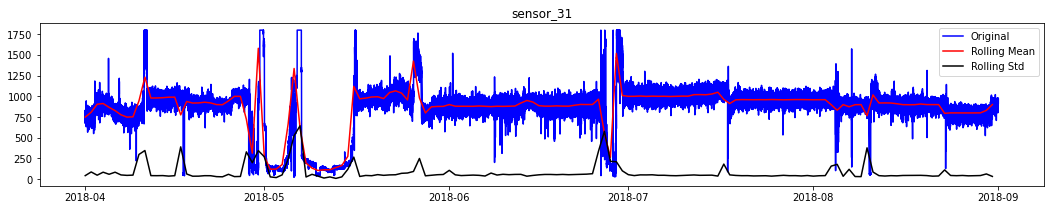

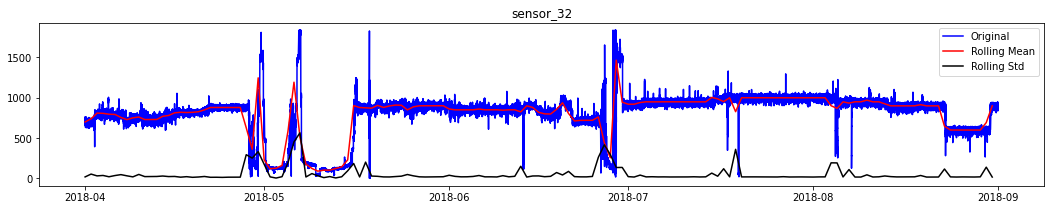

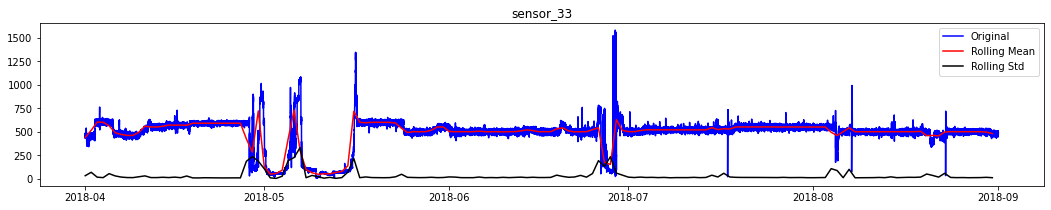

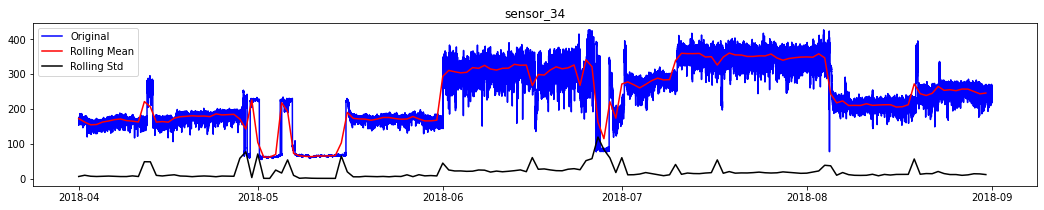

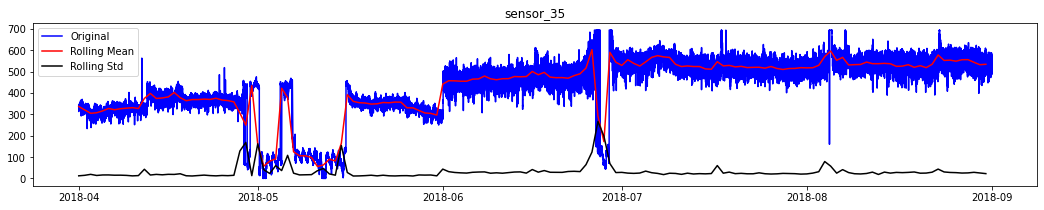

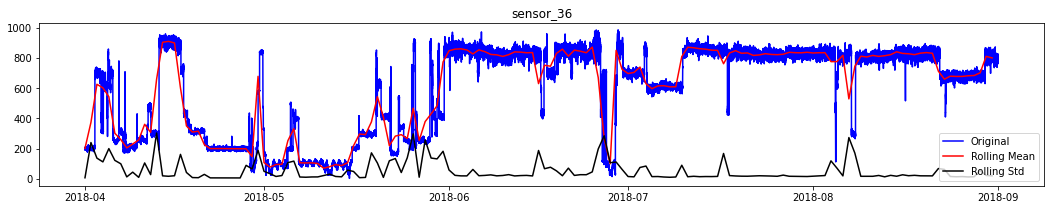

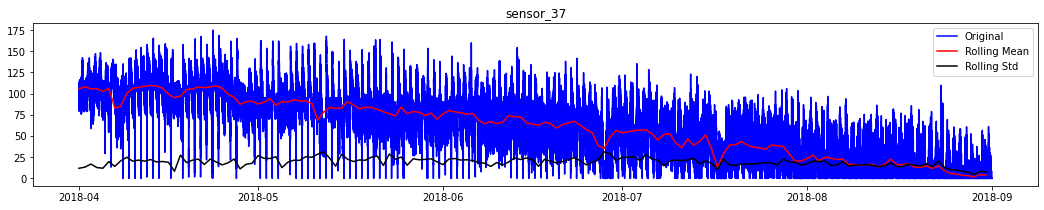

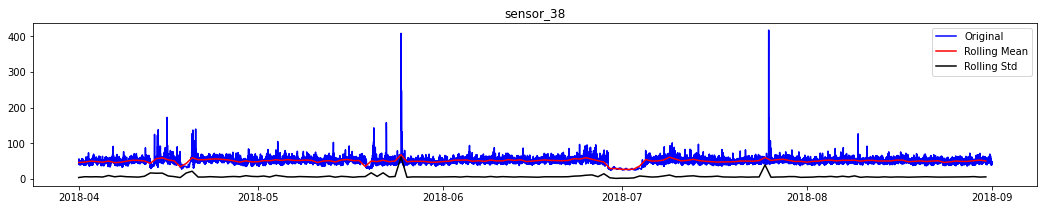

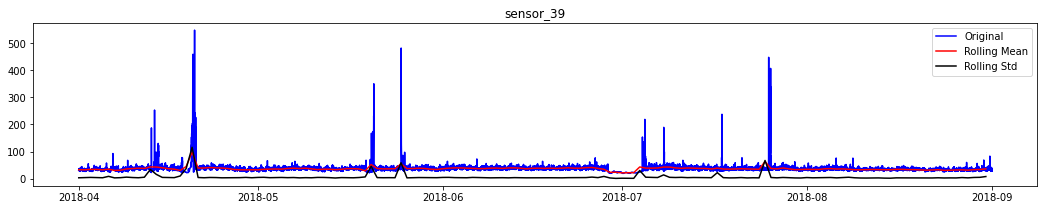

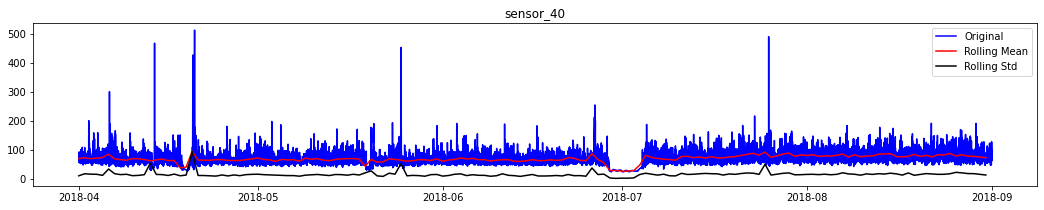

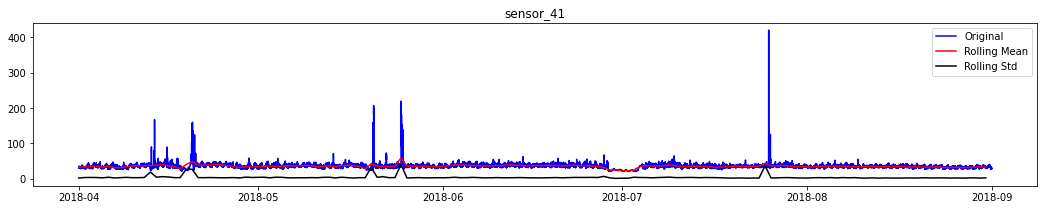

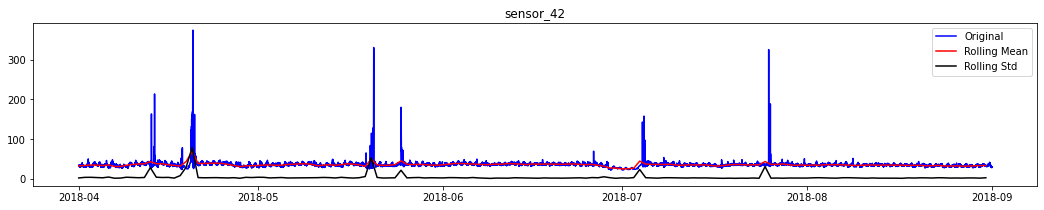

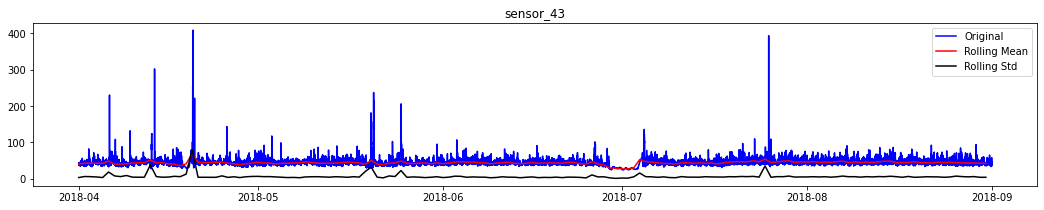

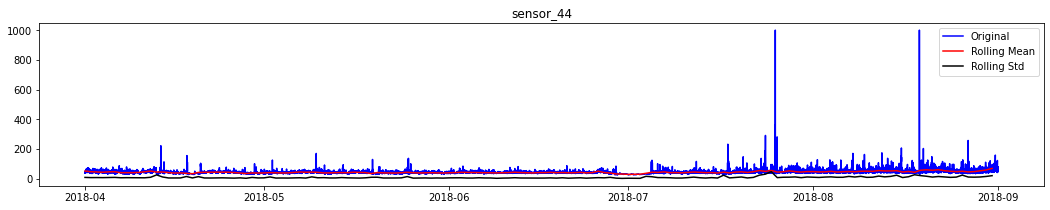

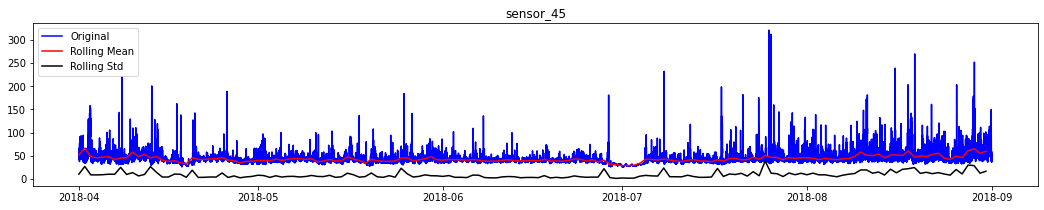

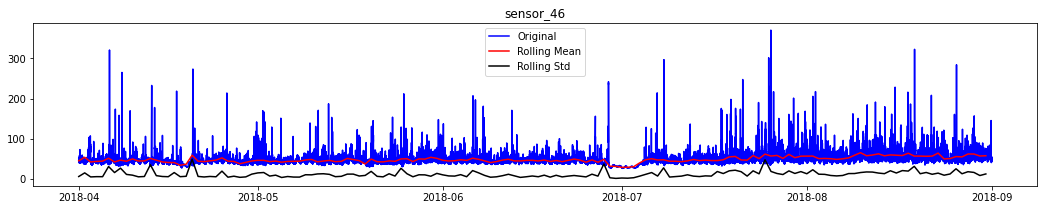

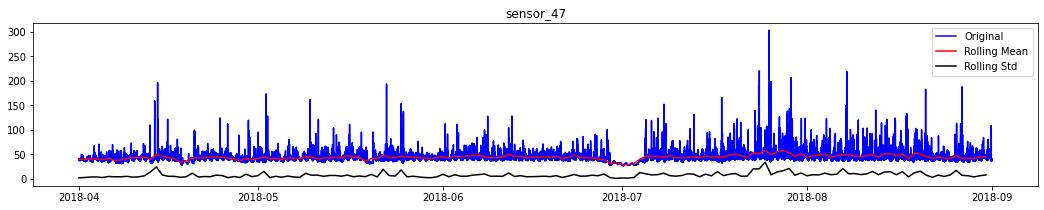

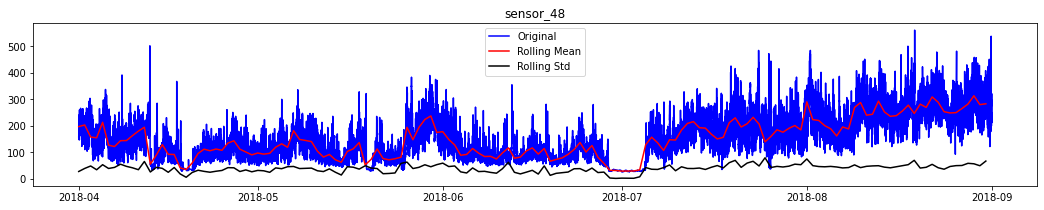

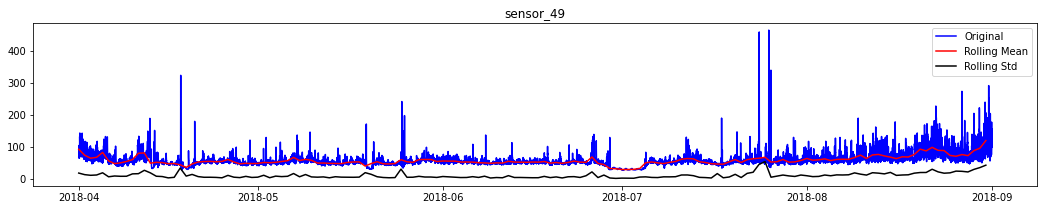

In [22]:
# Resample the entire dataset by daily average
rollmean = df_data_new.resample(rule='D').mean()  # Rolling mean
rollstd = df_data_new.resample(rule='D').std()    # Rolling std

# Plot time series for each sensor with its mean and standard deviation
names = getSensorColnames()
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df_data_new[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

Looking at the readings from one of the sensors, for example 'sensor_17' in this case, notice that the data actually looks pretty stationary where the rolling mean and standard deviation don’t seem to change over time except during the downtime of the pump which is expected. This was the case for most of the sensors in this data set but it may not always be the case in which situations various transformation methods must be applied to make the data stationary before training the data.

### Stationary

In [23]:
from statsmodels.tsa.stattools import adfuller


def checkStationaryUsingDickeyFullerTest(data, thres_stnry=0.05):
    """
    Check if the data is stationary using Dickey Fuller Test.
    Ref:
        https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
        https://stackoverflow.com/questions/47349422/how-to-interpret-adfuller-test-results
    """
    # Run Augmented Dickey Fuller Test
    
    # Returns tuple of (adf, pvalue, usedlag, nobs, critical_values_dict, icbest)
    result = result = adfuller(data)
    
    # Get probability that null hypothesis will not be rejected
    pvalue = result[1]
    
    # If pvalue is less than 0.05 (5%) then the Null Hypothesis can be rejected
    # and we cann say the data is stationary
    is_stnry = pvalue < thres_stnry
    
    return is_stnry, result



### Autocorelation
It can be done one of the two ways; either with the pandas autocorr() method or ACF plot.

**Degree of correlation:**
Ref: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/

- **Perfect**: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- **High degree**: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- **Moderate degree**: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- **Low degree**: When the value lies below + .29, then it is said to be a small correlation.
- **No correlation**: When the value is zero.

In [24]:
LAGS = 20
ALPHA = 0.05

names = getSensorColnames()

df_autocorr = pd.DataFrame(data=[{"sensor": sensor, "autocorr": df_data_new[sensor].dropna().autocorr(lag=LAGS)} for sensor in names])
df_autocorr.sort_values(by='autocorr', ascending=True)

# Print sensors that seems to be correlated
df_autocorr[df_autocorr['autocorr']<0.9]

sensor  autocorr
37  sensor_38  0.692618
38  sensor_39  0.707169
39  sensor_40  0.616495
40  sensor_41  0.745722
41  sensor_42  0.814772
42  sensor_43  0.696078
43  sensor_44  0.533710
44  sensor_45  0.590255
45  sensor_46  0.534020
46  sensor_47  0.526568
47  sensor_48  0.898504
48  sensor_49  0.791433

# Save Data

In [25]:
PATH_OUT = "data/_sensor_cleaned.csv"

df_data_new.reset_index(drop=True).to_csv(PATH_OUT, index=False)

print(f"New data saved to: {PATH_OUT}")

New data saved to: data/_sensor_cleaned.csv
